In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist as hst
from matplotlib.pyplot import figure
import matplotlib.image as mpimg
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import os

In [2]:
df = pd.read_csv("pga_tour_player_stats_TOURONLY_2.csv")

In [3]:
df

,Unnamed: 0,Player,Avg_Drive,Total_Dist,Total_Drives,Tournament,Year
0,0,Dan Pohl,282.6,2261,8.0,Pensacola Open,1980
1,1,Stanton Altgelt,280.1,2241,8.0,Pensacola Open,1980
2,2,Gary Hallberg,276.9,2215,8.0,Pensacola Open,1980
3,3,Dave Eichelberger,275.4,2203,8.0,Pensacola Open,1980
4,4,George Cadle,275.3,2202,8.0,Pensacola Open,1980
...,...,...,...,...,...,...,...
128167,128167,David Hearn,287.4,2299,8.0,Safeway Open,2021
128168,128168,Jim Furyk,286.5,2292,8.0,Safeway Open,2021
128169,128169,Rob Oppenheim,284.3,2274,8.0,Safeway Open,2021
128170,128170,Jonathan Byrd,278.4,2227,8.0,Safeway Open,2021


In [3]:
df_years=df.groupby("Year")

# Calculate: avg drive/year
plot_year=[]
avg_drive_year=[]
std_dv_drive=[]
avg_tot_dist=[]
avg_tot_drives=[]

for i in range(0,42):
    plot_year.append(1980+i)
    avg_drive_year.append(list(df_years)[i][1]["Avg_Drive"].mean())
    std_dv_drive.append(list(df_years)[i][1]["Avg_Drive"].std())
    avg_tot_dist.append(list(df_years)[i][1]["Total_Dist"].mean())
    avg_tot_drives.append(list(df_years)[i][1]["Total_Drives"].mean())
    


# Quantiles

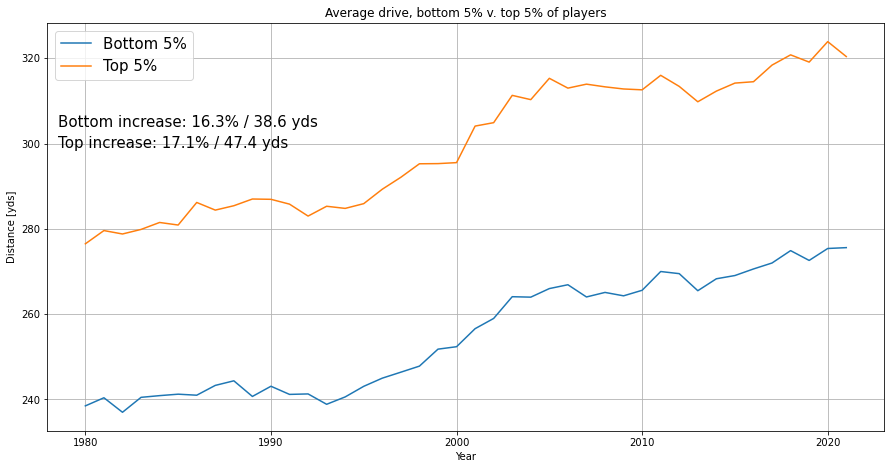

In [7]:
quant95=[list(df_years)[i][1]["Avg_Drive"].quantile(0.95) for i in range(0,42)]
quant05=[list(df_years)[i][1]["Avg_Drive"].quantile(0.05) for i in range(0,42)]
yrs=[i for i in range(1980,2022)]


figure(figsize=(15,7.5))
plt.grid(b=True)
plt.xlabel("Year")
plt.ylabel("Distance [yds]")
plt.title("Average drive, bottom 5% v. top 5% of players")

plt.text(1978.5,304,f"Bottom increase: {round(max(quant05)/min(quant05)*100-100,1)}% / {round(max(quant05)-min(quant05),1)} yds"
         ,fontsize=15)
plt.text(1978.5,299,f"Top increase: {round(max(quant95)/min(quant95)*100-100,1)}% / {round(max(quant95)-min(quant95),1)} yds",
         fontsize=15)

plt.plot(yrs,quant05,yrs,quant95)
plt.legend(["Bottom 5%","Top 5%"],fontsize=15)

plt.savefig('C:\\Users\\victo\\00_Nod_coding_bootcamp\\Week 3\\Project\\quantiles_all_TOURONLY.png')


# Averages

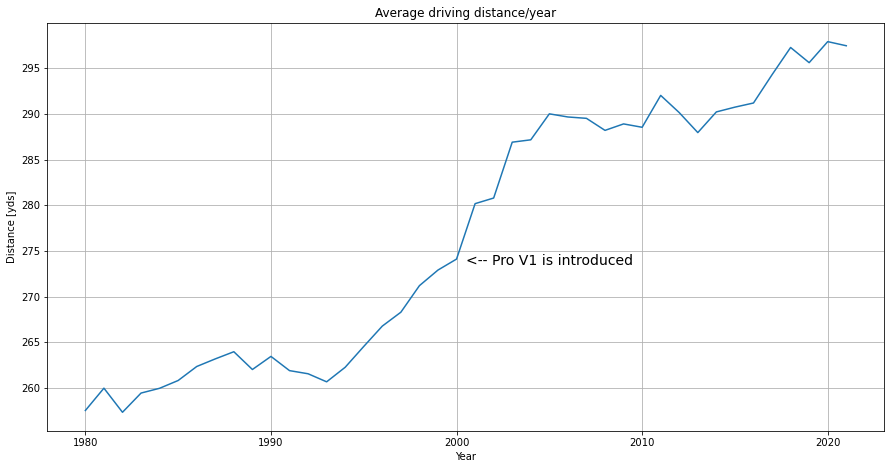

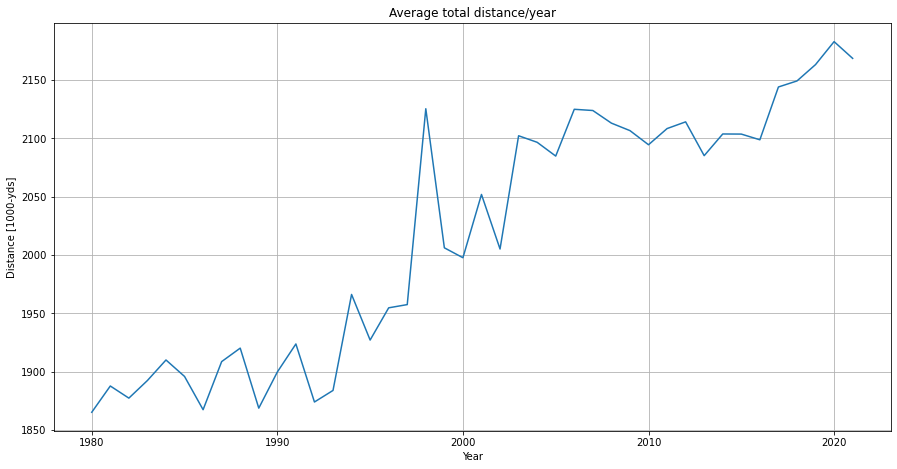

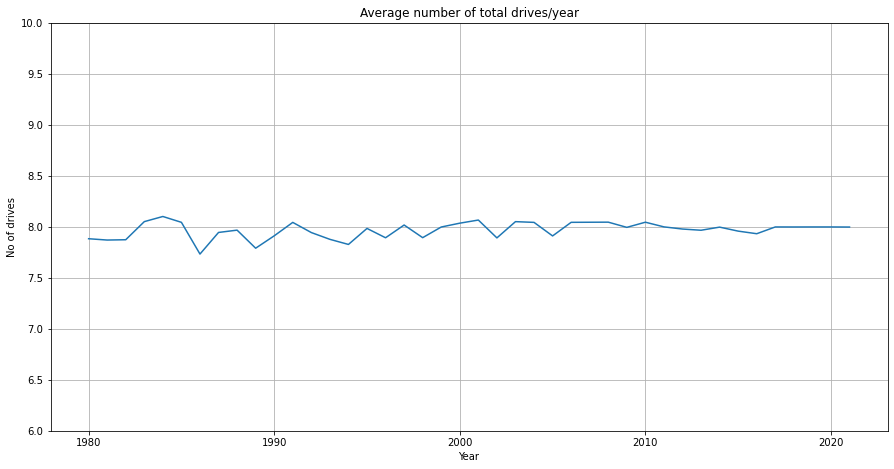

In [16]:
figure(figsize=(15,7.5))
plt.text(2000.5,273.5,"<-- Pro V1 is introduced",fontsize=14)
plt.grid(b=True)
plt.plot(plot_year,avg_drive_year)
plt.title("Average driving distance/year")
plt.xlabel("Year")
plt.ylabel("Distance [yds]")
plt.savefig('C:\\Users\\victo\\00_Nod_coding_bootcamp\\Week 3\\Project\\drive_all_prov1_TOURONLY.png')

figure(figsize=(15,7.5))
plt.grid(b=True)
plt.plot(plot_year,avg_tot_dist)
plt.title("Average total distance/year")
plt.xlabel("Year")
plt.ylabel("Distance [1000-yds]")
plt.savefig('C:\\Users\\victo\\00_Nod_coding_bootcamp\\Week 3\\Project\\avg_tot_dist_all_TOURONLY.png')

figure(figsize=(15,7.5))
plt.grid(b=True)
ax = plt.gca()
ax.set_ylim([6, 10])
plt.plot(plot_year,avg_tot_drives)
plt.title("Average number of total drives/year")
plt.xlabel("Year")
plt.ylabel("No of drives")
plt.savefig('C:\\Users\\victo\\00_Nod_coding_bootcamp\\Week 3\\Project\\avg_tot_no_all_TOURONLY.png')

# Standard deviation

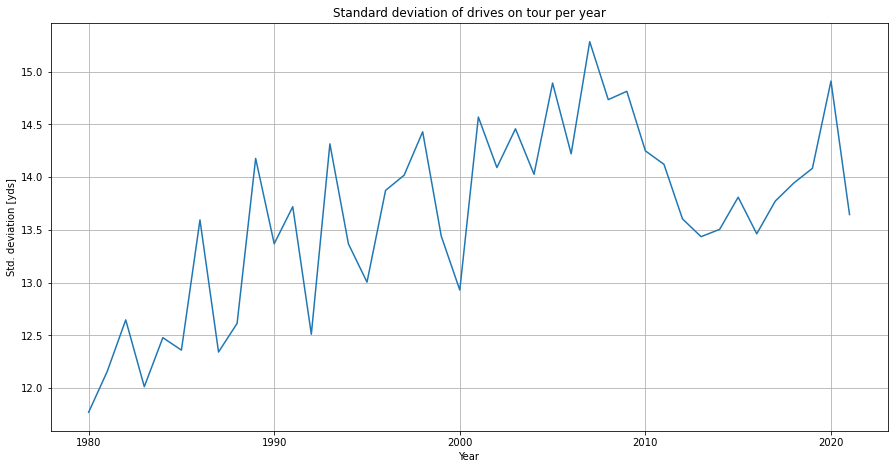

In [9]:
figure(figsize=(15,7.5))
plt.grid(b=True)
plt.plot(plot_year,std_dv_drive)
plt.title("Standard deviation of drives on tour per year")
plt.xlabel("Year")
plt.ylabel("Std. deviation [yds]")
plt.savefig('C:\\Users\\victo\\00_Nod_coding_bootcamp\\Week 3\\Project\\std_dev_all_TOURONLY.png')

# Histograms

C:\Users\victo\AppData\Local\Temp/ipykernel_13372/893365256.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(figsize=(15,5))


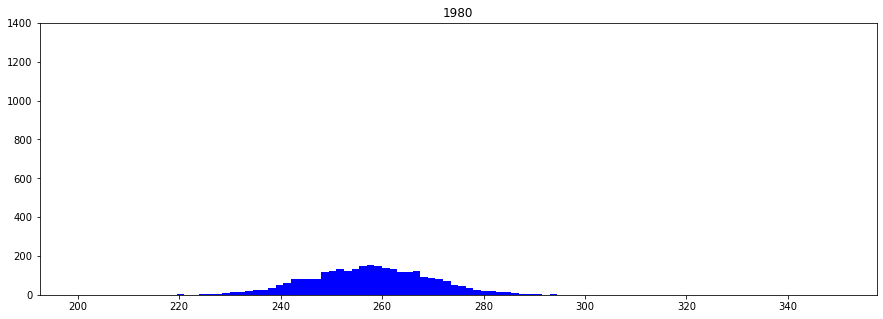

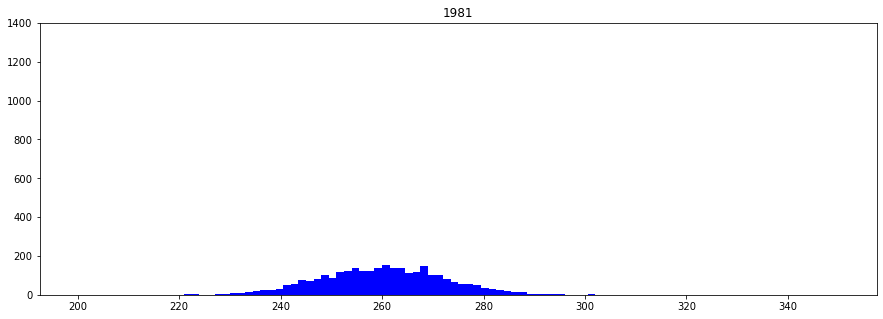

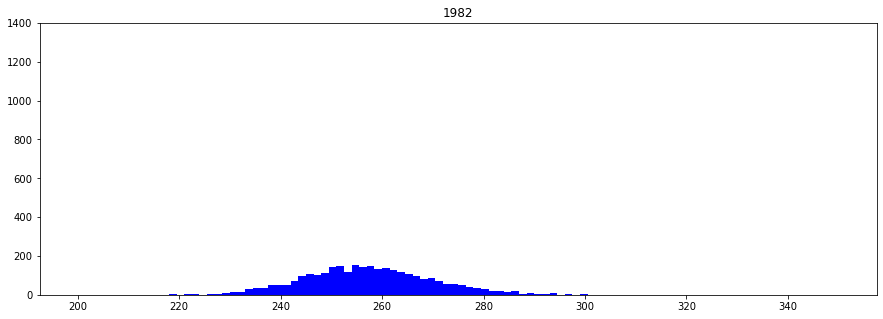

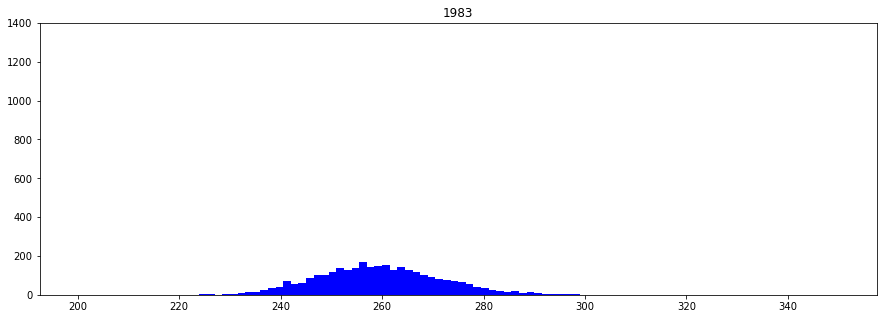

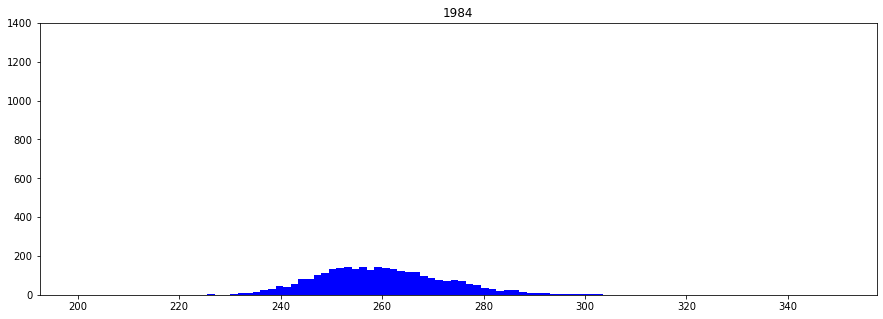

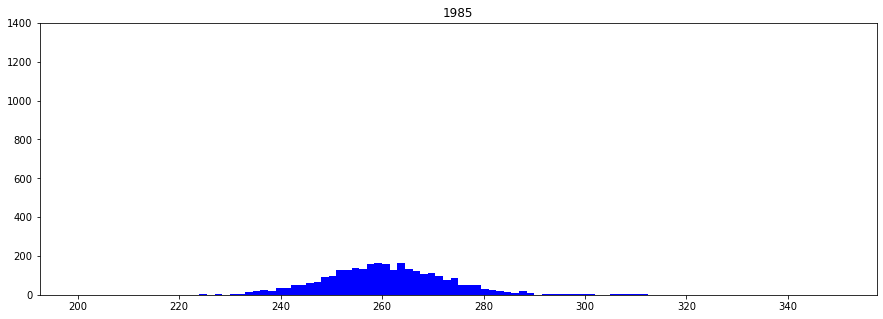

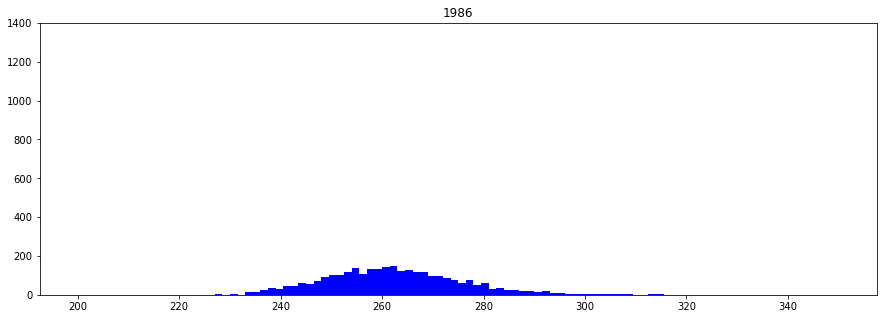

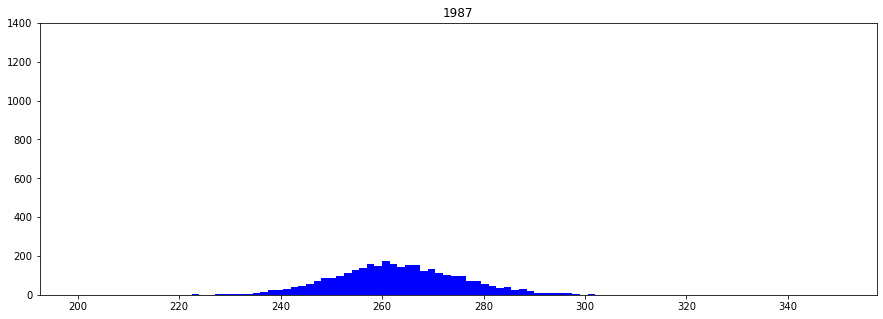

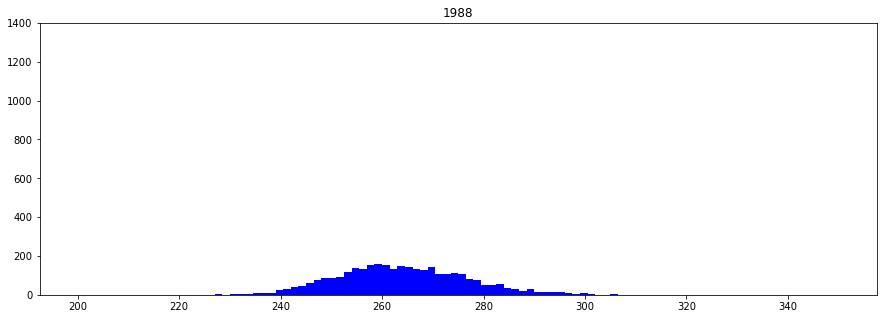

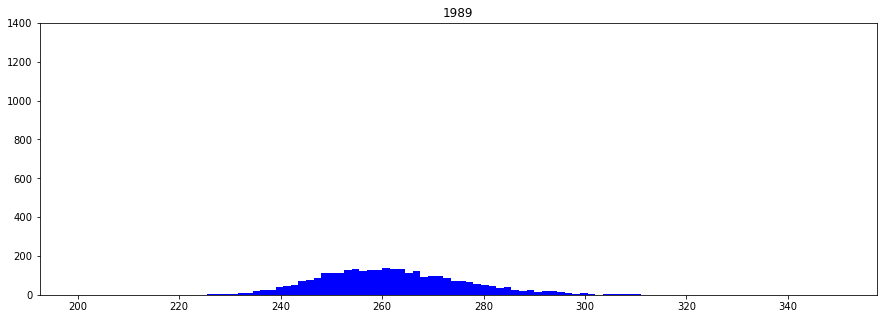

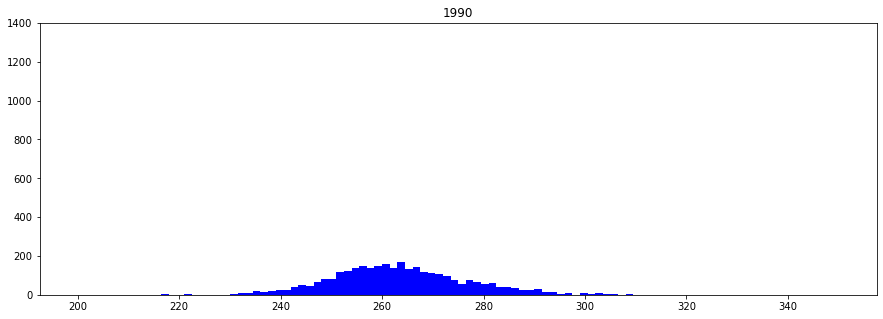

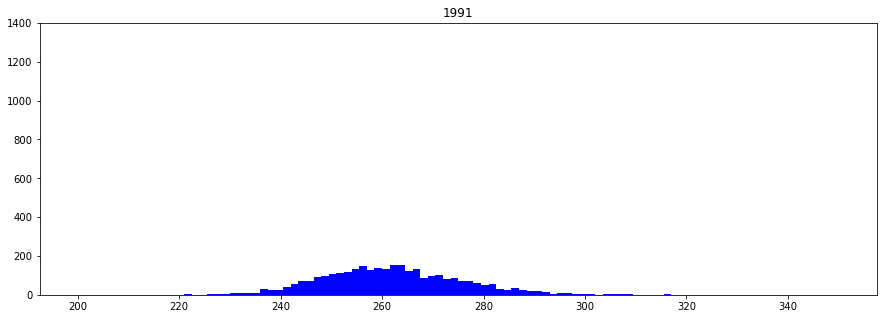

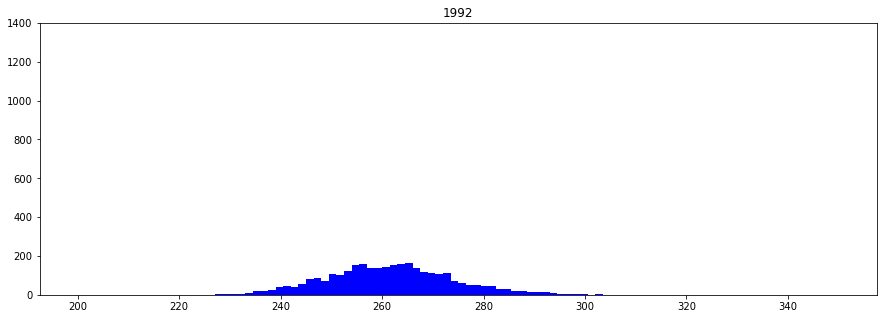

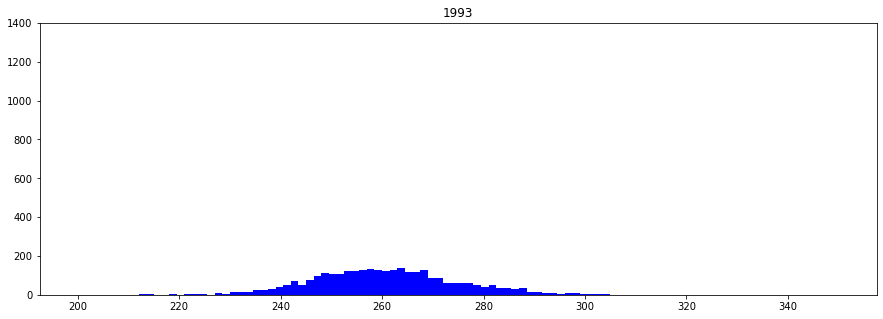

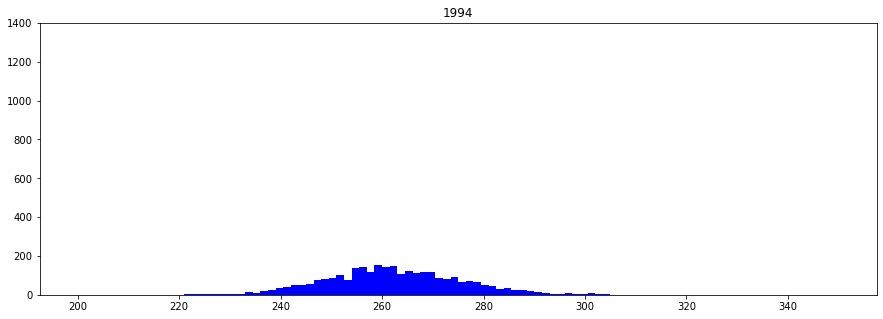

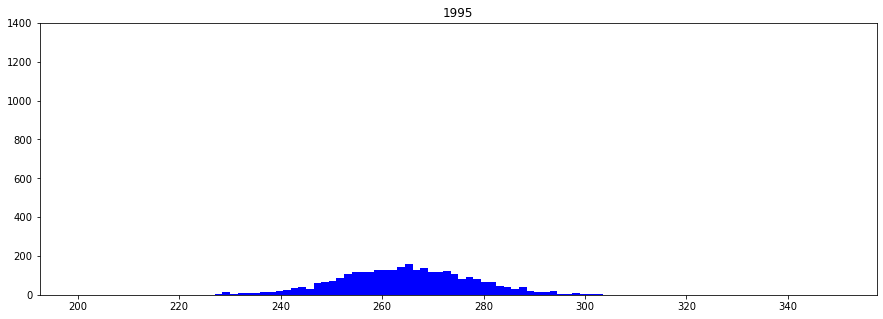

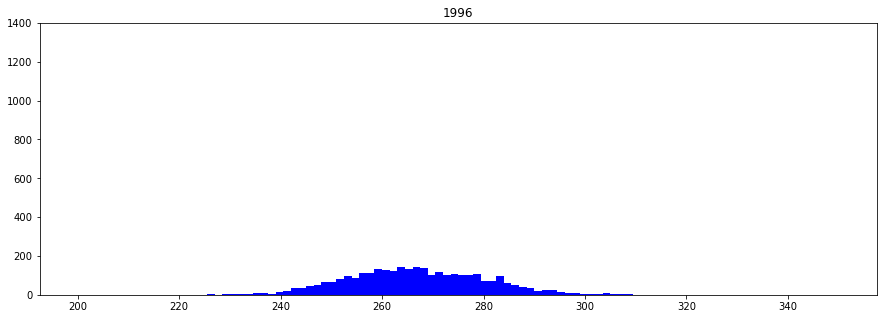

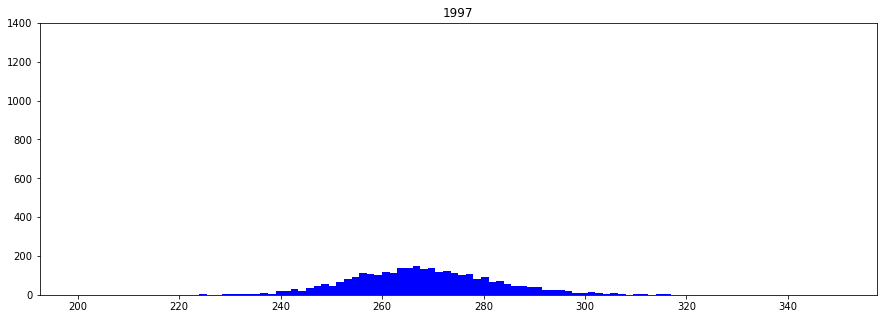

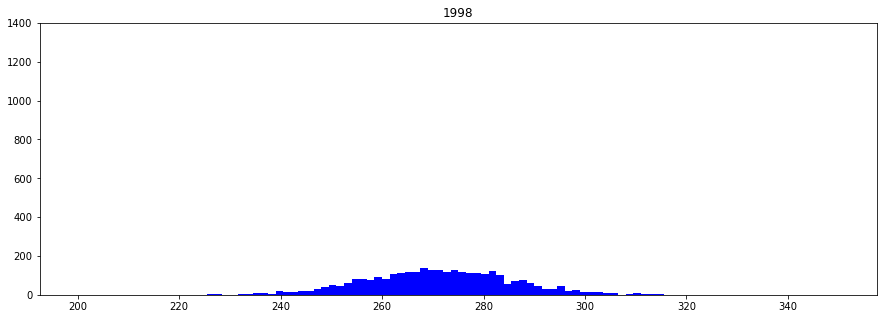

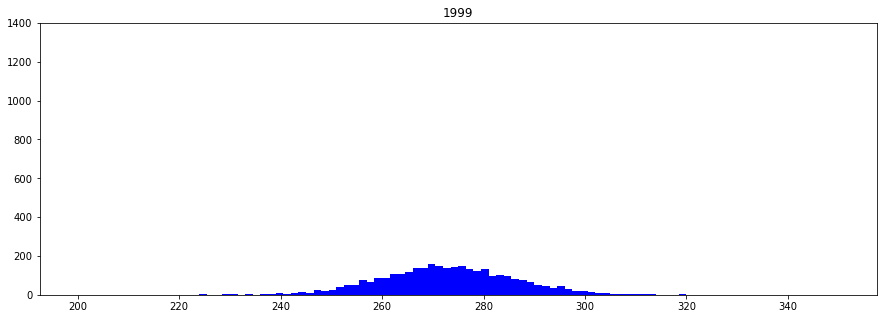

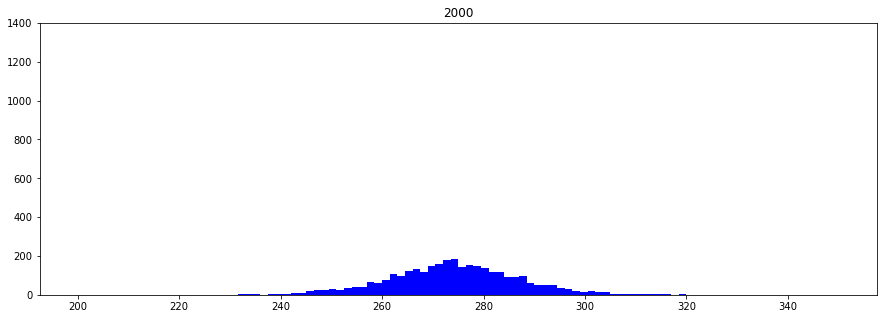

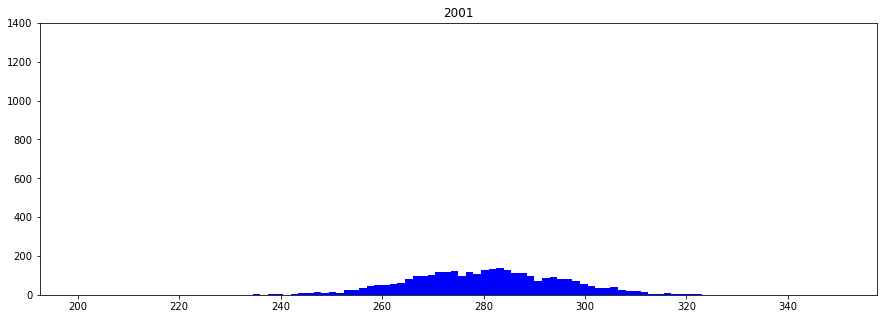

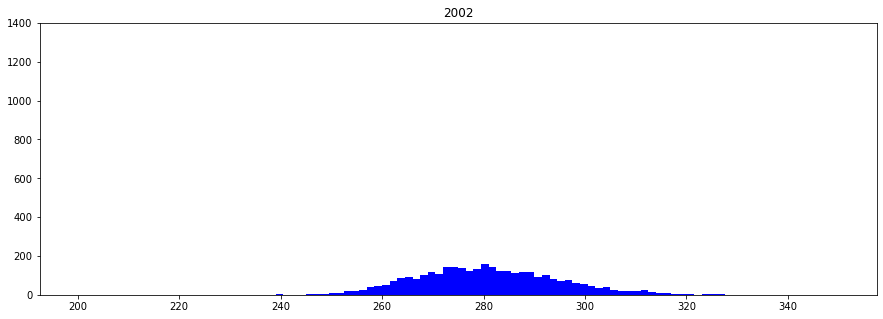

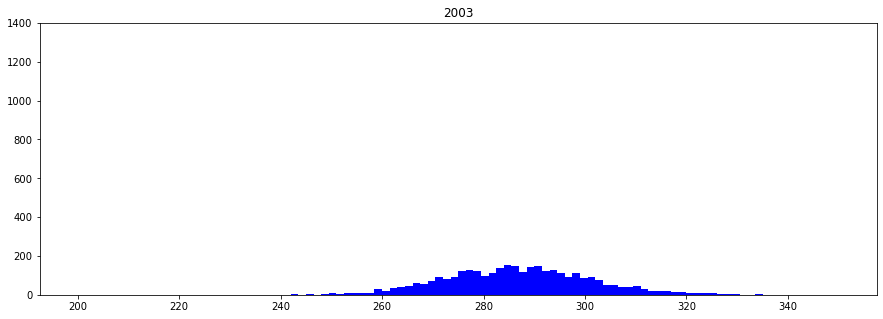

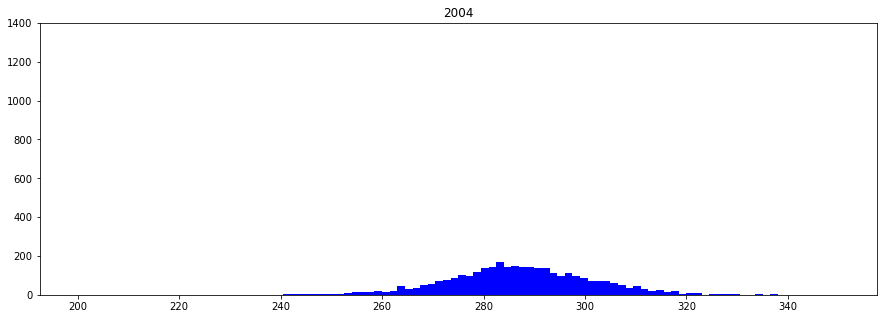

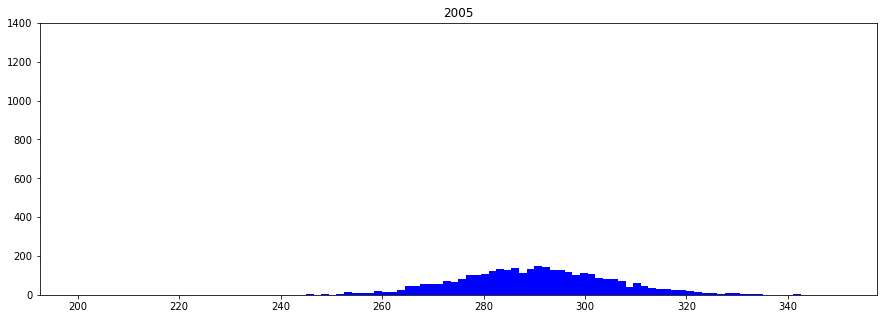

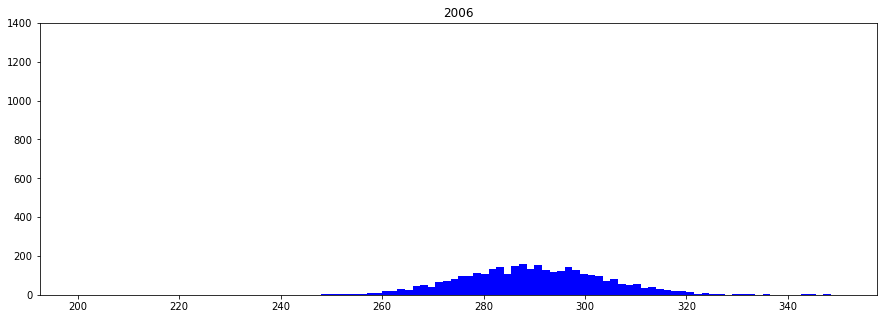

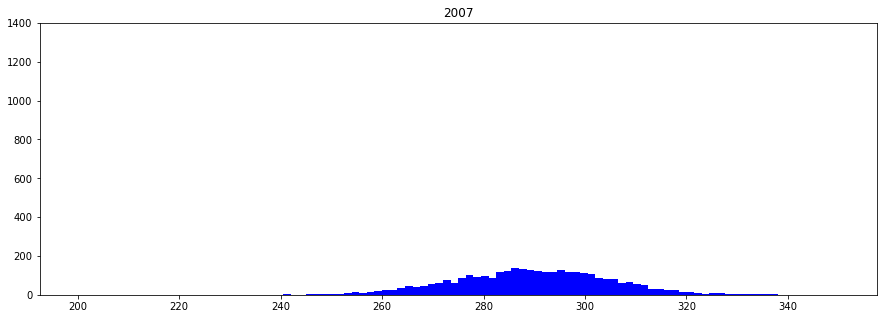

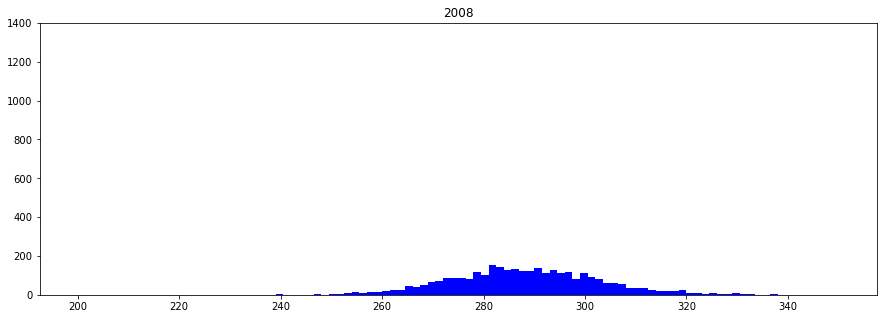

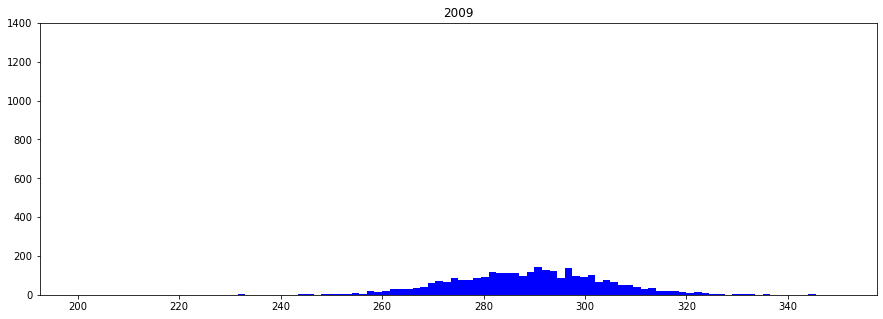

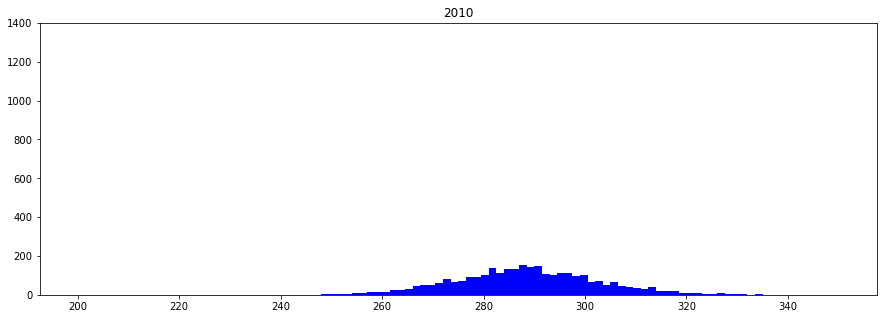

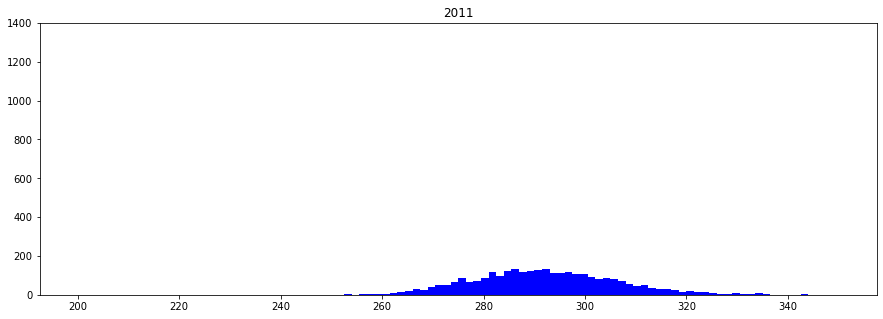

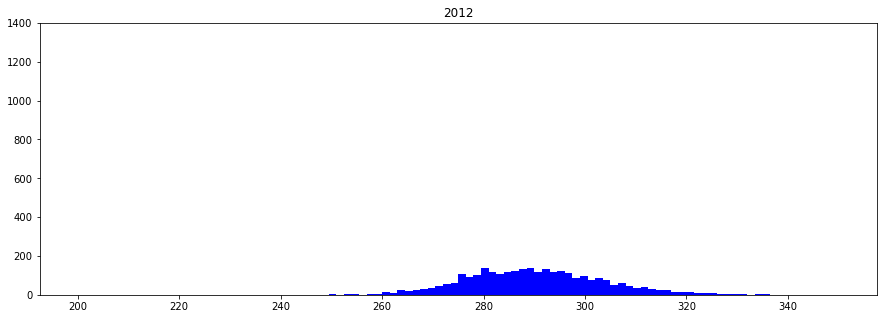

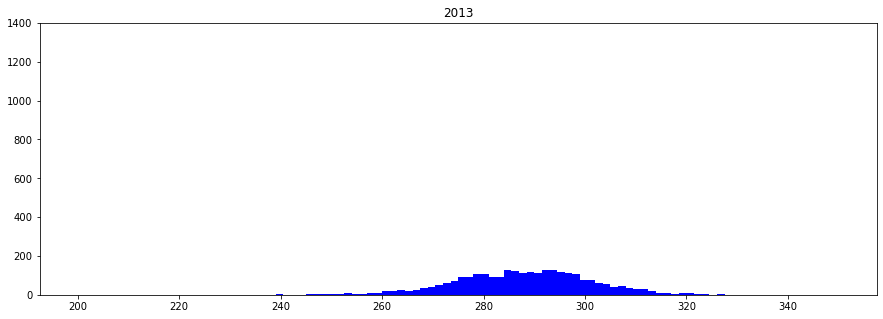

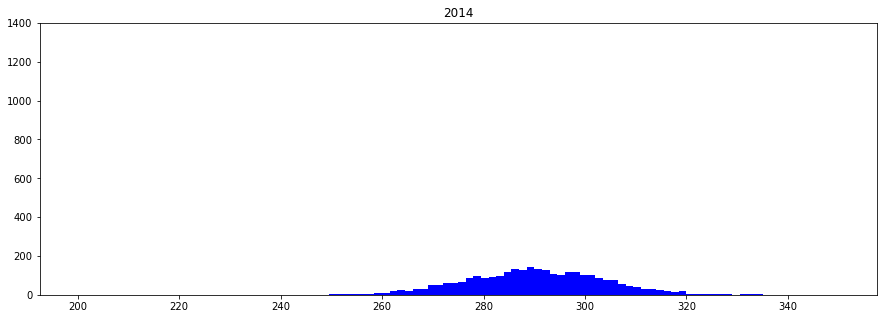

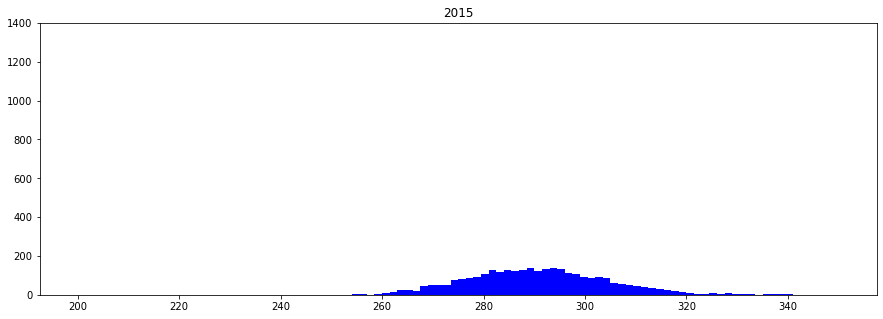

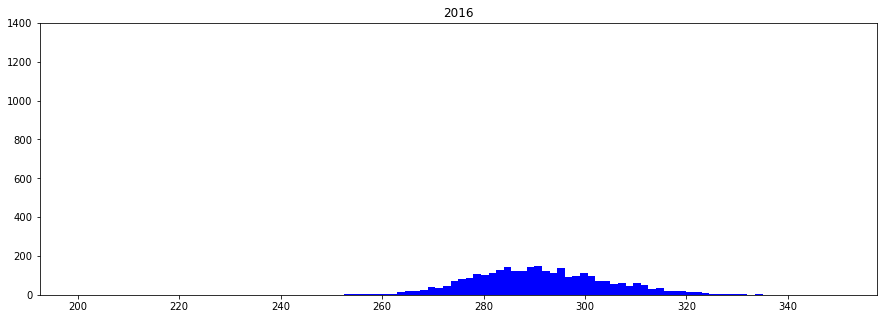

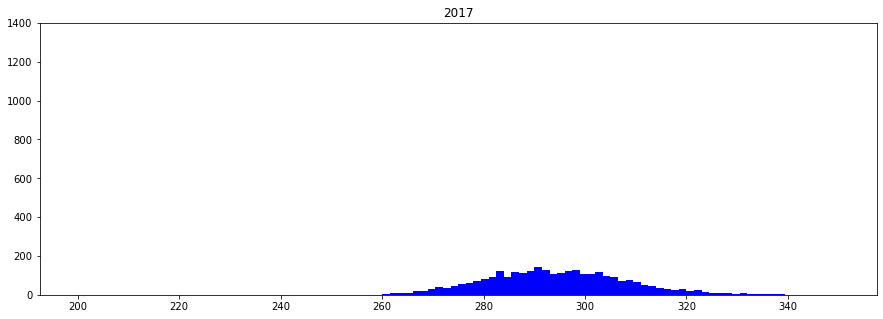

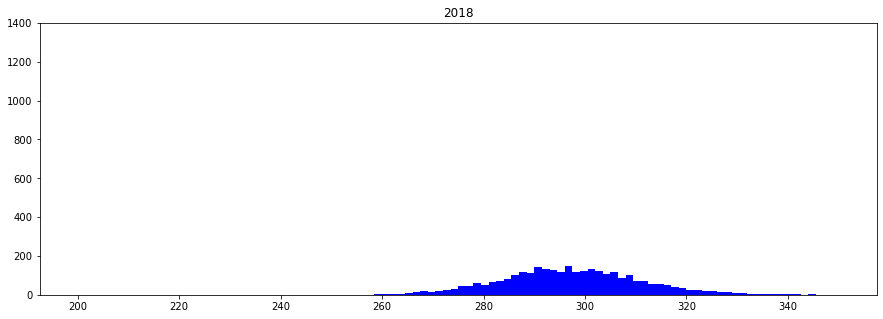

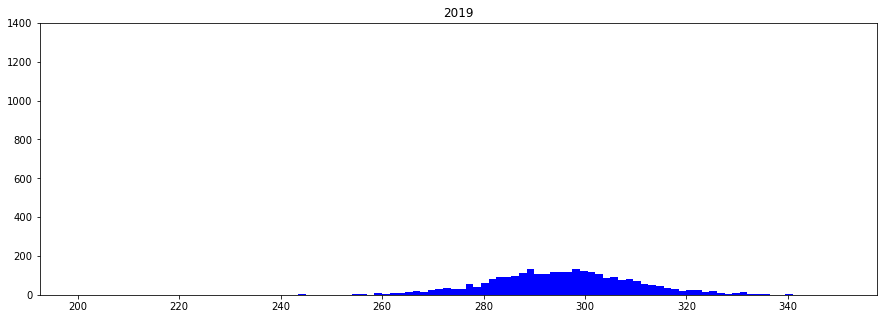

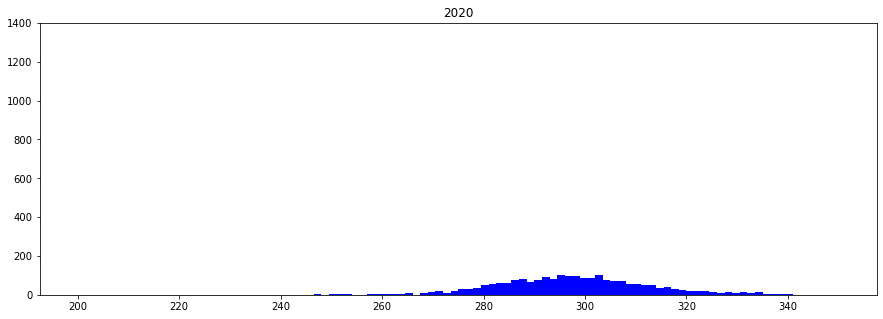

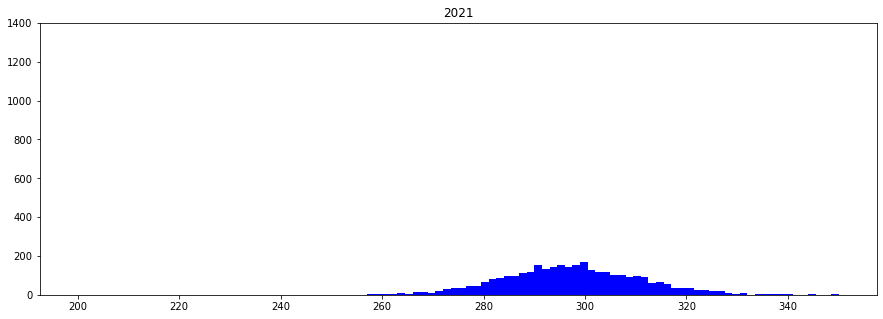

In [10]:
for i in range(0,42):
    figure(figsize=(15,5))
    plt.title(f"{1980+i}")
    ax = plt.gca()
    ax.set_ylim([0, 1400])
    hist=hst(list(df_years)[i][1]["Avg_Drive"],bins=100,range=(200,350),color="blue")
    plt.savefig(f'C:\\Users\\victo\\00_Nod_coding_bootcamp\\Week 3\\Project\\histograms\\histogram_{1980+i}_w_TOURONLY.png')

['Abc', 'cdA', 'hAg']